In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`

In [2]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('insurance_claims.csv')

# Review the DataFrame
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# List of columns to drop
columns_to_drop = ['policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable',\
                   'umbrella_limit', 'insured_zip','insured_occupation', 'insured_hobbies','incident_date',\
                   'auto_make','auto_model', 'auto_year',  '_c39','incident_state', 'incident_city' ,'policy_number','incident_location'   ]

# Drop the specified columns
clean_df = df.drop(columns=columns_to_drop)

# Check the result
clean_df.columns

Index(['months_as_customer', 'age', 'policy_annual_premium', 'insured_sex',
       'insured_education_level', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [4]:
clean_df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [5]:
clean_df['collision_type'] = clean_df['collision_type'].replace('?', 'NO')
clean_df.dropna(subset=['authorities_contacted'], inplace=True)

In [6]:
# Check the number of data per column
clean_df.count()

months_as_customer             909
age                            909
policy_annual_premium          909
insured_sex                    909
insured_education_level        909
insured_relationship           909
capital-gains                  909
capital-loss                   909
incident_type                  909
collision_type                 909
incident_severity              909
authorities_contacted          909
incident_hour_of_the_day       909
number_of_vehicles_involved    909
property_damage                909
bodily_injuries                909
witnesses                      909
police_report_available        909
total_claim_amount             909
injury_claim                   909
property_claim                 909
vehicle_claim                  909
fraud_reported                 909
dtype: int64

In [7]:
# Replace 'FEMALE' with 0 and 'MALE' with 1 in the 'insured_sex' column
clean_df['insured_sex'] = clean_df['insured_sex'].map({'FEMALE': 0, 'MALE': 1})
# Replace '?' with 'N' in the 'police_report_available' column
clean_df['police_report_available'] = clean_df['police_report_available'].replace('?', 'NO')
clean_df['property_damage'] = clean_df['property_damage'].replace('?', 'NO')

In [8]:
clean_df.head(20)

,months_as_customer,age,policy_annual_premium,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1406.91,1,MD,husband,53300,0,Single Vehicle Collision,Side Collision,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,1197.22,1,MD,other-relative,0,0,Vehicle Theft,NO,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,1413.14,0,PhD,own-child,35100,0,Multi-vehicle Collision,Rear Collision,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,1415.74,0,PhD,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
5,256,39,1351.10,0,PhD,unmarried,0,0,Multi-vehicle Collision,Rear Collision,...,3,NO,0,2,NO,64100,6410,6410,51280,Y
6,137,34,1333.35,1,PhD,husband,0,-77000,Multi-vehicle Collision,Front Collision,...,3,NO,0,0,NO,78650,21450,7150,50050,N
7,165,37,1137.03,1,Associate,unmarried,0,0,Multi-vehicle Collision,Front Collision,...,3,NO,2,2,YES,51590,9380,9380,32830,N
8,27,33,1442.99,0,PhD,own-child,0,0,Single Vehicle Collision,Front Collision,...,1,NO,1,1,YES,27700,2770,2770,22160,N
9,212,42,1315.68,1,PhD,wife,0,-39300,Single Vehicle Collision,Rear Collision,...,1,NO,2,1,NO,42300,4700,4700,32900,N
10,235,42,1253.12,0,Masters,other-relative,38400,0,Single Vehicle Collision,Front Collision,...,1,YES,2,2,NO,87010,7910,15820,63280,N


### 2. Separate the features `X` from the target `y`

In [9]:
# Separate the features, X, from the target variable, y
y = clean_df['fraud_reported']
X = clean_df.drop(columns='fraud_reported', axis=1)
# Preview the features data
X.head()

,months_as_customer,age,policy_annual_premium,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1406.91,1,MD,husband,53300,0,Single Vehicle Collision,Side Collision,...,5,1,YES,1,2,YES,71610,6510,13020,52080
1,228,42,1197.22,1,MD,other-relative,0,0,Vehicle Theft,NO,...,8,1,NO,0,0,NO,5070,780,780,3510
2,134,29,1413.14,0,PhD,own-child,35100,0,Multi-vehicle Collision,Rear Collision,...,7,3,NO,2,3,NO,34650,7700,3850,23100
3,256,41,1415.74,0,PhD,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,...,5,1,NO,1,2,NO,63400,6340,6340,50720
5,256,39,1351.10,0,PhD,unmarried,0,0,Multi-vehicle Collision,Rear Collision,...,19,3,NO,0,2,NO,64100,6410,6410,51280


# **2. Create the target vector by assigning the values of the `Default` column from the DataFrame.**

In [10]:
# Define target vector
y = clean_df['fraud_reported'].values.reshape(-1, 1)
y[:5]


array([['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y']], dtype=object)

Split the data into training and testing sets.

In [11]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## **3. Encode the categorical variables from the features data using `get_dummies`.**

In [12]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [13]:
# Review the features data
X.head()

,months_as_customer,age,policy_annual_premium,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,48,1406.91,1,53300,0,5,1,1,2,...,False,False,False,False,False,True,False,True,False,True
1,228,42,1197.22,1,0,0,8,1,0,0,...,False,False,False,False,False,True,True,False,True,False
2,134,29,1413.14,0,35100,0,7,3,2,3,...,False,False,False,False,False,True,True,False,True,False
3,256,41,1415.74,0,48900,-62400,5,1,1,2,...,False,False,False,False,False,True,True,False,True,False
5,256,39,1351.10,0,0,0,19,3,0,2,...,False,False,False,True,False,False,True,False,True,False


Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [14]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [16]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [17]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# *** Fitting the Decision Tree Model***

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [19]:
# Import DecisionTreeClassifier from sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier instance
model = DecisionTreeClassifier()


In [20]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

# **Making Predictions Using the Tree Model**

In [21]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

# **Model Evaluation**

In [22]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [23]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,146,35
Actual 1,27,20


Accuracy Score : 0.7280701754385965
Classification Report
              precision    recall  f1-score   support

           N       0.84      0.81      0.82       181
           Y       0.36      0.43      0.39        47

    accuracy                           0.73       228
   macro avg       0.60      0.62      0.61       228
weighted avg       0.74      0.73      0.74       228



# ** Visualizing the Decision Tree**

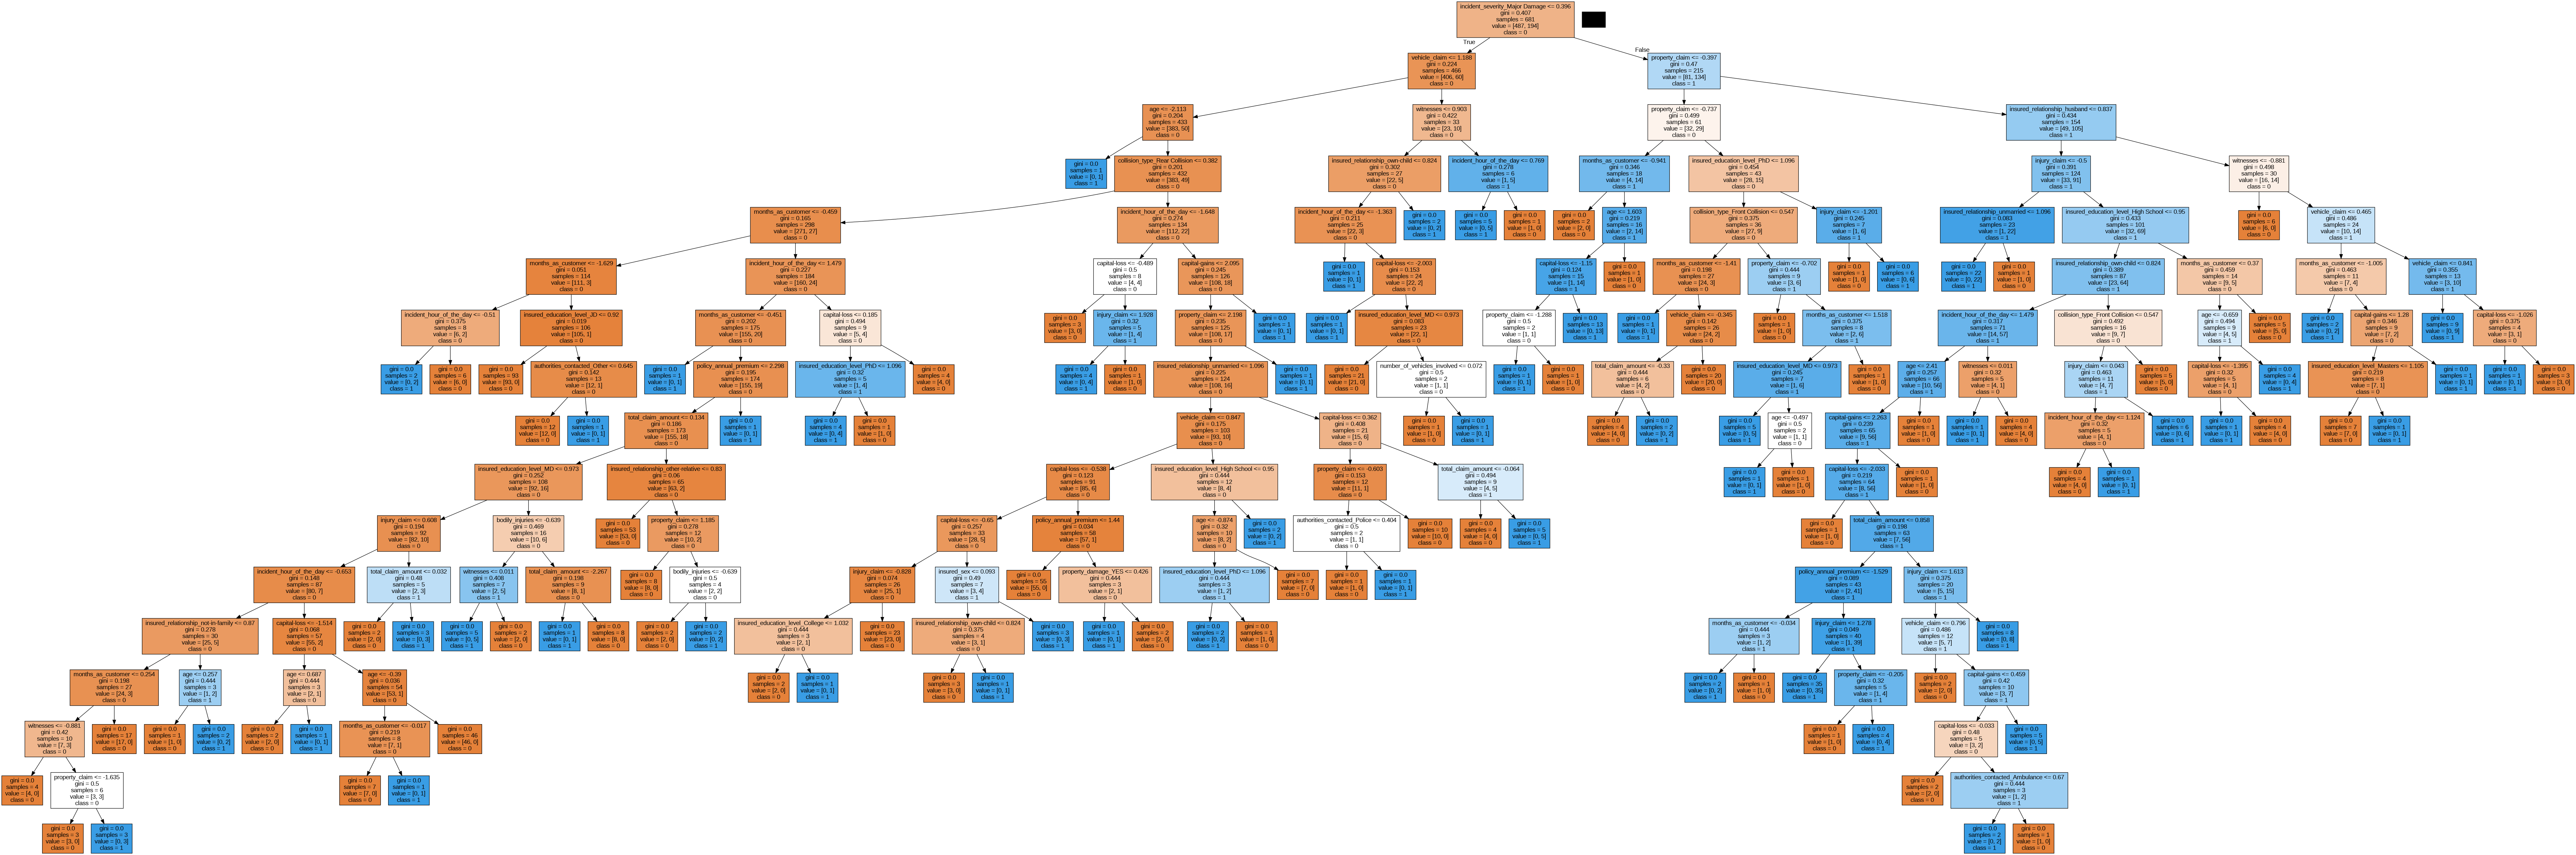

In [24]:
# Import necessary modules
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


In [26]:
# Import necessary modules
import os

# Create directory if it doesn't exist
output_dir = "../Resources"
os.makedirs(output_dir, exist_ok=True)

# Saving the tree as PDF
file_path_pdf = "/content/transactions_tree.pdf"
graph.write_pdf(file_path_pdf)

# Saving the tree as PNG
file_path_png = "/content/transactions_tree.png"
graph.write_png(file_path_png)


True

## Analysis Questions

Finally, analyze the model's evaluation results and answer the following questions.

* **Question 1:** Would you trust this model to detect if a loan will default?

 * **Answer:**  Based on the classification report, the K Nearest Neighbor (KNN) Classifier achieves an accuracy of 70%, which is relatively low. Furthermore, the F1-score and recall for class 'Y' (fraud reported) are 0.36 and 0.40, respectively, indicating that the model's ability to correctly identify fraud reports is limited. Therefore, I would not trust this model to reliably detect if a loan will default.
property_claim
vehicle_claim
total_claim_amount
injury_claim
policy_annual_premium
months_as_customer
age
incident_hour_of_the_day
incident_severity_Minor Damage
These features seem to have a significant impact on the model's predictions. Notably, features related to the severity of the incident (incident_severity_Major Damage and incident_severity_Minor Damage) and various claim amounts (property_claim, vehicle_claim, total_claim_amount, and injury_claim) are among the top features. This suggests that the severity of the incident and the amount of the claim play a crucial role in determining whether a fraud is reported. Additionally, features such as policy_annual_premium, months_as_customer, age, and incident_hour_of_the_day also appear to be important in predicting fraud reports. Therefore, when using this model, focusing on these top features could improve its performance and efficiency, and collecting new data mainly on these features would be sufficient for piloting this model in a business environment.